In [1]:
from sklearn import datasets,metrics,svm 
import numpy as np
from sklearn import model_selection 
import pandas as pd 

# load the csv file 

path = './diabetes.csv'

data = pd.read_csv(path)

print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = data.drop('Outcome',axis=1)
print(X.columns)
Y = data['Outcome']
print(Y)
print(Y.unique())



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
[1 0]


In [3]:
X = X.values
Y = Y.values


In [4]:
# split the data into train and test 
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,Y,test_size=0.3,random_state=10)

print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(537, 8) (537,)
(231, 8) (231,)


In [6]:
# create the model 
svmModel = svm.SVC(kernel='linear',random_state=2) # linear, poly, rbf, sigmoid
svmModel = svmModel.fit(Xtrain,ytrain)
op= svmModel.predict(Xtest)

acc= metrics.accuracy_score(op,ytest)
print('Accuracy: ',acc)



Accuracy:  0.7402597402597403


In [7]:
ratio = [0.5,0.4,0.3,0.2]
kernel = ['linear','poly','sigmoid','rbf']
result = np.zeros((len(ratio),len(kernel)))
for i in range(len(ratio)):
    for j in range(len(kernel)):
        # split the data into train and test 
        Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,Y,test_size=ratio[i],random_state=10)

        #print(Xtrain.shape,ytrain.shape)
        #print(Xtest.shape,ytest.shape)
        # create the model 
        svmModel = svm.SVC(kernel=kernel[j],random_state=2) # linear, poly, rbf, sigmoid
        svmModel = svmModel.fit(Xtrain,ytrain)
        op= svmModel.predict(Xtest)

        acc= metrics.accuracy_score(op,ytest)
        print('Accuracy: ',acc)
        result[i,j]=acc

print(result)



Accuracy:  0.7838541666666666
Accuracy:  0.7421875
Accuracy:  0.5338541666666666
Accuracy:  0.7421875
Accuracy:  0.7694805194805194
Accuracy:  0.724025974025974
Accuracy:  0.5487012987012987
Accuracy:  0.7207792207792207
Accuracy:  0.7402597402597403
Accuracy:  0.7186147186147186
Accuracy:  0.5238095238095238
Accuracy:  0.70995670995671
Accuracy:  0.7597402597402597
Accuracy:  0.7077922077922078
Accuracy:  0.512987012987013
Accuracy:  0.7077922077922078
[[0.78385417 0.7421875  0.53385417 0.7421875 ]
 [0.76948052 0.72402597 0.5487013  0.72077922]
 [0.74025974 0.71861472 0.52380952 0.70995671]
 [0.75974026 0.70779221 0.51298701 0.70779221]]


In [8]:
df = pd.DataFrame(result, index=ratio, columns=kernel)
df

,linear,poly,sigmoid,rbf
0.5,0.783854,0.742188,0.533854,0.742188
0.4,0.769481,0.724026,0.548701,0.720779
0.3,0.740260,0.718615,0.523810,0.709957
0.2,0.759740,0.707792,0.512987,0.707792


<AxesSubplot:>

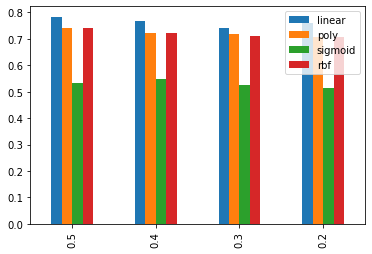

In [9]:
df.plot(kind='bar')